In [6]:
import numpy as np
from numpy import sqrt, log
import matplotlib.pyplot as plt

In [7]:
class Bandit:
    def __init__(self, m):
        # mean of the distribution of the values of the bandit (true mean)
        self.m = m
        # mean value obtained after pulling the bandit
        self.mean = 0
        # Number of times the bandit is pulled
        self.N = 0
        
    def __init__(self, m, upper_limit):
        # If using optimistic initial values algorithm, the upper limit must be specified
        self.m = m
        self.mean = upper_limit
        self.N = 0
        
    def pull(self):
        # return a random number in the distribution of mean m and stdev 1
        return np.random.randn() + self.m
    
    def update(self, x):
        # x is the latest sample received from the bandit
        self.N += 1
        self.mean = (1 - 1.0 / self.N) * self.mean + (1.0 / self.N) * x

In [23]:
# run experiment using:
#    - epsilon greedy algorithm (eps != 0, upper limits = 0)
#    - Optimistic initial values algorithm (eps = 0, upper limits != 0)
def run_experiment(m1, m2, m3, eps, N, upper_limit_1 = 0, upper_limit_2 = 0, upper_limit_3 = 0, UCB1 = False):
    bandits = [Bandit(m1, upper_limit_1), Bandit(m2, upper_limit_2), Bandit(m3, upper_limit_3)]
    
    data = np.empty(N)
    
    for i in range(N):
        # epsilon greedy algorithm
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            if UCB1:
                j = np.argmax([b.mean + sqrt(2 * log(i + 1) / (b.N + 10 ** -8)) for b in bandits])
            else:
                j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # Save value obtained from bandit
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # Plot moving average
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average

0.9591061461462034
2.004911068122483
3.001313693755833


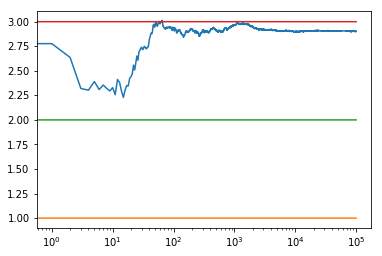

In [21]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

1.0256045090665746
1.9884084498857209
3.0001791943940814


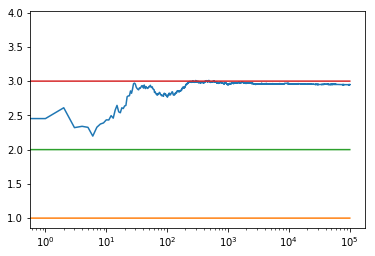

In [10]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

1.0963782191862521
2.0599269955850987
3.002531768129113


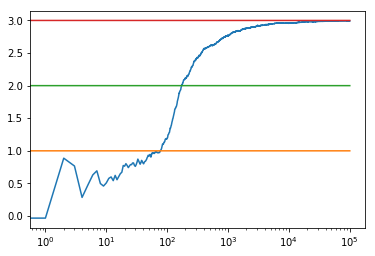

In [11]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

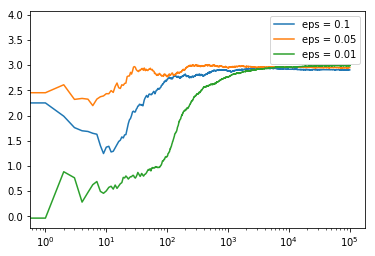

In [12]:
# log scale plot
plt.plot(c_1, label = 'eps = 0.1')
plt.plot(c_05, label = 'eps = 0.05')
plt.plot(c_01, label = 'eps = 0.01')
plt.legend()
plt.xscale('log')

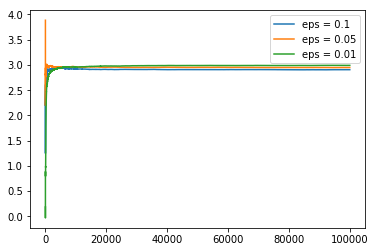

In [13]:
# linear plot
plt.plot(c_1, label = 'eps = 0.1')
plt.plot(c_05, label = 'eps = 0.05')
plt.plot(c_01, label = 'eps = 0.01')
plt.legend()

-0.17789547835796338
1.1484954093816149
3.0059706241197626


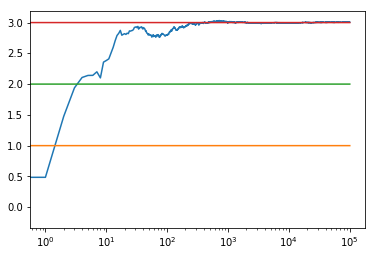

In [15]:
c_opt = run_experiment(1.0, 2.0, 3.0, 0, 100000, 10, 10, 10)

In [16]:
c_opt

array([-0.17789548,  0.48529997,  1.47716913, ...,  3.0059157 ,
        3.00591708,  3.00592021])

1.1283787622232486
2.0510968588399066
2.9958551071560673


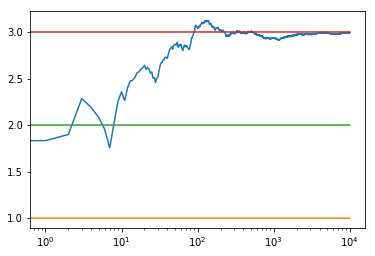

In [24]:
c_opt = run_experiment(1.0, 2.0, 3.0, 0, 10000, 10, 10, 10, True)